# GPTChallenge: diagnóstico a partir de HCE

Vamos a trabajar con el corpus CodEsp (textos de historial clínico etiquetados con sus códigos CIE-10 Diagnóstico)

In [1]:
import pandas as pd
import os, re
import numpy as np

pd.options.display.max_colwidth = None

In [2]:
#los códigos están en un TSV con un código por línea
train_diag = pd.read_csv("data/train/train.tsv", sep="\t", header=None, names=["archivo", "codigo"])
train_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   archivo  8316 non-null   object
 1   codigo   8316 non-null   object
dtypes: object(2)
memory usage: 130.1+ KB


In [3]:
train_diag['codigo'].value_counts()

codigo
r52        163
r69        150
r50.9      142
i10        116
r59.9       95
          ... 
d37.030      1
c79.71       1
g25.0        1
l76.3        1
n81.2        1
Name: count, Length: 2194, dtype: int64

In [4]:
#cogemos la categoría superior de cada código y las agrupamos
train_diag['cat'] = train_diag['codigo'].str.extract(r'(\w\d\d)')
print(train_diag['cat'].value_counts())
train_diag['cat'].nunique()

cat
r52    163
r10    163
r59    160
r69    150
r50    144
      ... 
c31      1
d62      1
s53      1
s34      1
n81      1
Name: count, Length: 918, dtype: int64


918

In [5]:
categories=train_diag['cat'].value_counts()[:10]
top_categorias = categories.index.to_list()
print(top_categorias)

['r52', 'r10', 'r59', 'r69', 'r50', 'r60', 'i10', 'r11', 'n28', 'd49']


In [6]:
type(train_diag['cat'])

pandas.core.series.Series

In [7]:
#seleccionamos sólo las etiquetas de este subconjunto
train_diag = train_diag[np.isin(train_diag['cat'], top_categorias)]

In [8]:
#cargamos los dos conjuntos de train
path = 'data/train/text_files/'

corpus = []
for f in [f for f in os.listdir(path) if f.endswith('.txt')]:
    with open(os.path.join(path, f), encoding="utf8") as text:
        texto = text.read()
    #buscamos códigos
    file = f[:-4]
    codigos = train_diag.query('archivo==@file')['cat'].to_list()
    codigos = list(set(codigos))
    if codigos:
        corpus.append({
            'archivo': file,
            'texto': texto,
            'codigos': codigos
        })
    
df_train = pd.DataFrame(corpus).set_index('archivo')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, S0004-06142005000700014-1 to S2340-98942015000100005-1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   texto    562 non-null    object
 1   codigos  562 non-null    object
dtypes: object(2)
memory usage: 13.2+ KB


In [34]:
df_train.sample(3)

,texto,codigos
archivo,,
S1139-76322016000400018-1,"Varón de 26 días de vida sin antecedentes familiares, prenatales o perinatales de relevancia. Hacia las tres semanas de vida comienza a presentar vómitos, que fueron en aumento, y el día previo a su ingreso se presentaron con cada toma, abundantes y en proyectil. El paciente se mostraba ávido por comer y con buen estado general.\nAl presentarse en el Departamento de Urgencias, se tuvo la sospecha clínica de estenosis hipertrófica de píloro, apoyada por una gasometría que mostraba alcalosis metabólica y un ultrasonido con imagen en diana característica. El paciente fue intervenido de forma abierta mediante la técnica de Ramstedt, sin incidencias. Antes del procedimiento el paciente fue intubado sin complicaciones.\nA las 14 horas de la cirugía se escucha por primera vez estridor de predominio inspiratorio, que no se modificaba con el sueño, la posición ni con la alimentación. Se reinterrogó a la madre, que negó haberlo escuchado antes. El paciente no presentaba ningún dato de dificultad respiratoria ni desaturación del oxígeno en la pulsioximetría.\nDado que se trataba de un paciente previamente sano al que no se le había escuchado estridor antes, se sospechó que la intubación operatoria y el edema postraumático asociado pudieran ser la causa. Se administró nebulización con adrenalina y una dosis de dexametasona intravenosa. Tras dos horas, el estridor no se había modificado, y al continuar el paciente sin signos de dificultad respiratoria, se inició el abordaje de este problema.\nEn una radiografía simple de tórax no se observaron anormalidades en el parénquima pulmonar, estructuras del cuello o columna de aire traqueal. Posteriormente, mediante una nasolaringoendoscopia flexible se comprobaron las estructuras supraglóticas y las cuerdas vocales íntegras, sin alteraciones morfológicas ni movimientos anormales. El siguiente paso fue la realización de una serie fluoroscópica con contraste oral, que demostró una muesca en la pared posterior del tercio superior del esófago. Durante ese tiempo el paciente no mostró cambios en su sintomatología. Tras la cirugía de píloro no había vuelto a presentar vómitos. En ningún momento presentó datos de dificultad respiratoria asociados al estridor.\nDías después se realizó una broncoscopia, en la que se observó una compresión extrínseca 2 cm por encima de la carina, pulsátil, que obstruía más del 50% de la luz de la tráquea y no se modificaba con presión positiva. Ante la fuerte sospecha de una malformación vascular que fuera responsable de la disminución del calibre traqueal, se realizó una angiografía por tomografía computarizada (angio-TC), en la que se pudo identificar un doble arco aórtico completo, con predominancia del arco derecho como causa de la constricción traqueal. La ecocardiografía fue normal.\n\nEl paciente fue operado por medio de una cirugía de abordaje torácico lateral izquierdo que se realizó sin contratiempos.\n\nEn las primeras horas posquirúrgicas se notó una importante disminución en la intensidad del ruido inspiratorio. Fue dado de alta y durante las siguientes semanas el estridor residual continuó disminuyendo. No volvió a presentar síntomas respiratorios ni digestivos, y en una consulta de seguimiento a dos meses de la cirugía el estridor terminó por desaparecer del todo.\n","[r11, r60]"
S0210-48062010000100019-4,"Paciente mujer de 74 años, ingresada previamente en varias ocasiones con diagnósticos de bronquiectasias y neumonitis peribronquiectásicas, anemia severa multifactorial, insuficiencia renal crónica, signos endoscópicos de gastritis crónica difusa, con factor reumatoide positivo. Como consecuencia de una caída casual presentó fractura del húmero izquierdo y cadera del mismo lado. Durante su ingreso en Traumatología presentó un cuadro de hematuria macróscopica (postsondaje), hipotensión, febrícula, empeoramiento de la función renal, que obligó a su traslado a la Unidad de Cuidados Intensivos, donde falleció

## Cargar los textos del conjunto de test

In [43]:
#los códigos están en un TSV con un código por línea
test_diag = pd.read_csv("data/test/test.tsv", sep="\t", header=None, names=["archivo"])
test_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   archivo  192 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [44]:
path = 'data/test/text_files/'

corpus = []
for f in [f for f in os.listdir(path) if f.endswith('.txt')]:
    with open(os.path.join(path, f), encoding="utf8") as text:
        texto = text.read()
        corpus.append({
            'archivo': file,
            'texto': texto,
        })
    
df_test = pd.DataFrame(corpus).set_index('archivo')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, S2340-98942015000100005-1 to S2340-98942015000100005-1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texto   250 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [45]:
df_test.sample(3)

,texto
archivo,
S2340-98942015000100005-1,"Paciente mujer de 34 años con antecedentes de abuelo materno fallecido de Carcinoma pulmón. Sinusitis siete años antes. Consulta con su ORL por una historia clínica de 14 meses de evolución con rinorrea y epístaxis rápidamente progresiva. Mediante rinoscopia se objetiva una masa en fosa nasal derecha de aspecto polipoideo muy sangrante al contacto, que ocupa toda la fosa nasal derecha, parece conectar con el tabique y cornete medio, extendiéndose hasta la coana, y ocupando la nasofaringe. La biopsia fue positiva para estesioneuroblastoma.\nSe realiza TAC de cabeza y cuello donde se aprecia una masa polipoidea de 4 centímetros (cm) con un gran pedículo en fosa nasal derecha y cavum. La RNM de cabeza y cuello objetiva una lesión ocupante de espacio que oblitera de forma llamativa el cavum y se extiende desde el nivel de las fosas nasales hacia atrás, poniéndose en contacto con la musculatura prevertebral, sin infiltrarla, y bien delimitada.\n\nSe realiza como estudio de extensión un TAC de tórax y una gammagrafía ósea sin patología. Se clasifica como Estadio C de Kadish.\nEs intervenida mediante cirugía funcional endoscópica siendo la Anatomía Patológica de estesioneuroblastoma. En el TAC postoperatorio destaca a nivel del seno maxilar derecho un engrosamiento polipoideo de la mucosa, sin evidencia de características de malignidad, a nivel de seno frontal derecho.\n\nSe decide como tratamiento adyuvante con Radioterapia externa, mediante Acelerador Lineal con fotones de 6 y 15 MV, con cuñas de compensación tisular tras simulación virtual y planificación 3D sobre TC helicoidal individualizado. El lecho tumoral recibió una dosis global de 60 Gy en 30 fracciones, con esquema de 2 Gy/fracción, 5 fracciones a la semana. La tolerancia fue buena, presentando toxicidad máxima cutánea G1, mucosa G2 y orofaríngea G2. En la actualidad han transcurrido 6 meses de la irradiación, manteniéndose la respuesta completa.\n\n"
S2340-98942015000100005-1,"Paciente de 76 años de sexo femenino, que consulta en un Servicio de Urgencias hospitalario, por presentar dolor en área mandibular de tres días de evolución.\nTras la exploración médica, la paciente fue remitida a su domicilio con el diagnóstico de ""artrosis mandibular"" prescribiéndole analgésicos y recomendándole que acudiera al dentista.\nHoras después la paciente acudió a nuestra consulta, donde le aplicamos el protocolo de estudio a pacientes con desórdenes temporomandibulares (DTM) y como examen complementario le practicamos una ortopantomografía.\nDentro de los antecedentes médicos personales de la paciente, cabe destacar que padecía hipertensión arterial desde hace 3 años y hipercolesterolemia desde hace un año.\nEn la anamnesis acerca de las características temporoespaciales del dolor, la paciente refiere que presenta episodios de dolor en región submandibular bilateral, de tres días de evolución, que ahora se irradia a zona precordial y a la garganta. Los episodios de dolor tienen una duración que oscila entre los cinco y diez minutos, con sensación de falta el aire y sudoración acompañante. En este día ha presentado tres episodios. Este dolor ha sido resistente a los analgésicos que le prescribieron en el servicio de urgencias.\nTras la realización del examen estomatológico completo, encontramos un ""Clic"" de apertura en articulación temporomandibular derecha y crepitación en el lado izquierdo. Oclusalmente presentaba mordida cruzada y desviación de la línea media dental. La función mandibular estaba conservada con una apertura máxima de 39 mm.\nEn la ortopantomografía se evidenciaban signos de artrosis leve en la articulación temporomandibular izquierda.\nEstos hallazgos no justificaban la clínica del dolor que presenta la paciente, por lo que emitimos el diagnóstico clínico de presunción de ""cardiopatía isquémica"" y remitimos a la paciente, con carácter urgente, desde nuestra consulta a un centro hospitalario para evaluación y tratamiento

## Binarizar las etiquetas

In [9]:
# para entrenar un clasificador multi-etiqueta generamos una matriz binaria de las etiquetas
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['codigos'])

#Guardamos las clases utilizadas en el conjunto de train
clases = mlb.classes_
num_classes = clases.shape
print(num_classes[0])

10


## Procesamiento del lenguaje natural

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# Function to tokenize and obtain embeddings
def get_bert_embeddings(text):
    # Tokenize text
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    # Get BERT model output
    with torch.no_grad():
        output = model(**tokens)
    # Extract embeddings for [CLS] token
    embeddings = output.last_hidden_state[:,0,:].squeeze(0).numpy()
    return embeddings

# Assuming 'df' is your DataFrame and 'text_column' is the name of the column containing the text
df_train['embedding'] = df_train['texto'].apply(lambda x: get_bert_embeddings(x))

# Save the DataFrame with the embeddings column
df_train.to_csv('data_with_embeddings.tsv', index=False, sep = "\t")

In [37]:
df_train["embedding"][0].shape

C:\Users\pablo\AppData\Local\Temp\ipykernel_21884\2811247242.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_train["embedding"][0].shape


(768,)

In [63]:
df_train.head(1)

texto  \
0  Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha.\nLa exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin soplos, roces ni extratonos. Auscultación pulmonar con conservación del murmullo vesicular. Abdomen blando, depresible, sin masas ni megalias. En la exploración neurológica no se detectan signos meníngeos ni datos de focalidad. Extremidades sin varices ni edemas. Pulsos periféricos presentes y simétricos. En la exploración urológica se aprecia el teste derecho aumentado de tamaño, no adherido a piel, con zonas de fluctuación e intensamente doloroso a la palpación, con pérdida del límite epidídimo-testicular y transiluminación positiva.\nLos datos analíticos muestran los siguentes resultados: Hemograma: Hb 13,7 g/dl; leucocitos 14.610/mm3 (neutrófilos 77%); plaquetas 206.000/ mm3. VSG: 40 mm 1ª hora. Coagulación: TQ 87%; TTPA 25,8 seg. Bioquímica: Glucosa 117 mg/dl; urea 29 mg/dl; creatinina 0,9 mg/dl; sodio 136 mEq/l; potasio 3,6 mEq/l; GOT 11 U/l; GPT 24 U/l; GGT 34 U/l; fosfatasa alcalina 136 U/l; calcio 8,3 mg/dl. Orina: sedimento normal.\nDurante el ingreso se solicitan Hemocultivos: positivo para Brucella y Serologías específicas para Brucella: Rosa de Bengala +++; Test de Coombs > 1/1280; Brucellacapt > 1/5120. Las pruebas de imagen solicitadas ( Rx tórax, Ecografía abdominal, TAC craneal, Ecocardiograma transtorácico) no evidencian patología significativa, excepto la Ecografía testicular, que muestra engrosamiento de la bolsa escrotal con pequeña cantidad de líquido con septos y testículo aumentado de tamaño con pequeñas zonas hipoecoicas en su interior que pueden representar microabscesos.\nCon el diagnóstico de orquiepididimitis secundaria a Brucella se instaura tratamiento sintomático (antitérmicos, antiinflamatorios, reposo y elevación testicular) así como tratamiento antibiótico específico: Doxiciclina 100 mg vía oral cada 12 horas (durante 6 semanas) y Estreptomicina 1 gramo intramuscular cada 24 horas (durante 3 semanas). El paciente mejora significativamente de su cuadro tras una semana de ingreso, decidiéndose el alta a su domicilio donde completó la pauta de tratamiento antibiótico. En revisiones sucesivas en consultas se constató la completa remisión del cuadro.\n   

                 codigos  \
0  ['r60', 'r52', 'r50']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [10]:
df_train = pd.read_csv("data_with_embeddings.tsv", index_col=False, sep = "\t")

In [11]:
df_train['codigos'] = df_train['codigos'].apply(lambda s: eval(s))

In [12]:
# para entrenar un clasificador multi-etiqueta generamos una matriz binaria de las etiquetas
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer() 
y_train = mlb.fit_transform(df_train['codigos'])

#Guardamos las clases utilizadas en el conjunto de train
clases = mlb.classes_
num_classes = clases.shape
print(num_classes[0])

10


In [13]:
X = df_train['embedding']
y = y_train

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [15]:
def insert_space_before_negative(string):
    return re.sub(r'(\s-)', r' \1', string)

X_train = X_train.apply(lambda x: insert_space_before_negative(x))
X_test = X_test.apply(lambda x: insert_space_before_negative(x))
X_val = X_val.apply(lambda x: insert_space_before_negative(x))

In [16]:
X_train = X_train.apply(lambda s: s.replace("\n", ""))
X_test = X_test.apply(lambda s: s.replace("\n", ""))
X_val = X_val.apply(lambda s: s.replace("\n", ""))

In [17]:
X_train = X_train.apply(lambda s: s.replace("  ", ", "))
X_test = X_test.apply(lambda s: s.replace("  ", ", "))
X_val = X_val.apply(lambda s: s.replace("  ", ", "))

In [18]:
X_train = X_train.apply(lambda s: eval(s))
X_test = X_test.apply(lambda s: eval(s))
X_val = X_val.apply(lambda s: eval(s))

In [19]:
X_train_list = X_train.to_list()
X_val_list = X_val.to_list()
X_test_list = X_test.to_list()

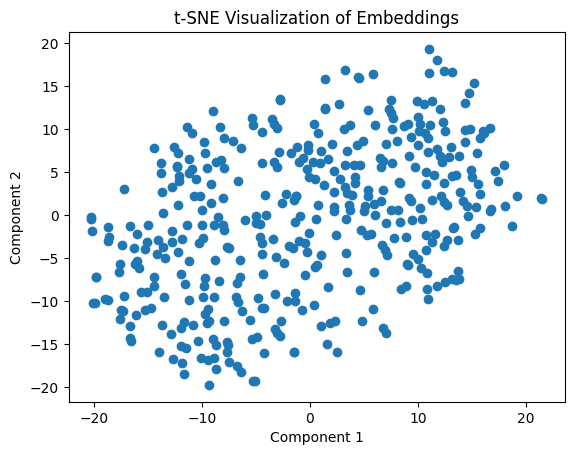

In [156]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

embeddings_array = np.array(X_train_list)

# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE to the data and transform the data to 3D
X_tsne = tsne.fit_transform(embeddings_array)

# Plot the embeddings in a 3D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization of Embeddings')
plt.show()

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
# Use the best parameters to train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000)

multi_output_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the classifier
multi_output_rf.fit(X_train_list, y_train)

# Predict on the validation set
y_pred = multi_output_rf.predict(X_val_list)

# Print classification report
print(classification_report(y_val, y_pred))

# Evaluate on the test set
test_score = multi_output_rf.score(X_test_list, y_test)
print("Test set accuracy:", test_score)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         7
           5       1.00      0.07      0.13        14
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        13

   micro avg       0.33      0.01      0.02        89
   macro avg       0.10      0.01      0.01        89
weighted avg       0.16      0.01      0.02        89
 samples avg       0.02      0.01      0.01        89

Test set accuracy: 0.017699115044247787


## Modelos

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultilabelClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultilabelClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid activation for multilabel classification
        return x

# Define dimensions
input_dim = 768  # Dimensionality of original vectors
hidden_dim = 256  # Number of hidden units
output_dim = len(y_train[0])  # Number of output units (number of labels)

# Initialize the model
model = MultilabelClassifier(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for multilabel classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_list, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_list, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_list, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Train the model
epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model on the validation set
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)
    print(f"Validation Loss: {val_loss.item()}")

# Evaluate the model on the test set
test_outputs = model(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor)
print(f"Test Loss: {test_loss.item()}")


Epoch 1/10, Loss: 0.7115357518196106
Epoch 2/10, Loss: 0.5939211249351501
Epoch 3/10, Loss: 0.5313473343849182
Epoch 4/10, Loss: 0.5046191215515137
Epoch 5/10, Loss: 0.499576210975647
Epoch 6/10, Loss: 0.5038400888442993
Epoch 7/10, Loss: 0.5068204998970032
Epoch 8/10, Loss: 0.5051059722900391
Epoch 9/10, Loss: 0.5002796649932861
Epoch 10/10, Loss: 0.4944015145301819
Validation Loss: 0.468278169631958
Test Loss: 0.5008335113525391


In [109]:
# Define a threshold for predicted probabilities
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
def threshold_predictions(predictions, threshold):
    return (predictions >= threshold).astype(int)

# Convert probabilities to binary predictions for validation set
val_predictions = threshold_predictions(val_outputs.numpy(), threshold)

# Calculate accuracy for each label
accuracies = []
for i in range(output_dim):
    correct = (val_predictions[:, i] == y_val[:, i]).sum().item()
    total = len(y_val[:, i])
    accuracy = correct / total
    accuracies.append(accuracy)

# Calculate overall accuracy (average of label accuracies)
overall_accuracy = sum(accuracies) / len(accuracies)
print("Overall Validation Accuracy:", overall_accuracy)


Overall Validation Accuracy: 0.8827160493827161


In [26]:
labels = top_categorias
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}

In [27]:
from transformers import AutoModelForSequenceClassification
from sklearn.decomposition import PCA

model = AutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

classifier = nn.Linear(768, len(labels))

model = nn.Sequential(model, classifier)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_list, dtype=torch.float32).long()
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).long()
X_val_tensor = torch.tensor(X_val_list, dtype=torch.float32).long()
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).long()
X_test_tensor = torch.tensor(X_test_list, dtype=torch.float32).long()
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).long()


model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)
    print(f"Validation Loss: {val_loss.item()}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: The expanded size of the tensor (768) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [45, 768].  Tensor sizes: [1, 512]

In [ ]:
model

In [160]:
batch_size = 8
metric_name = "f1"

In [161]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [162]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [164]:
trainer = Trainer(
    model,
    args,
    train_dataset=X_train_tensor,
    eval_dataset=X_val_tensor,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [165]:
trainer.train()

  0%|          | 0/255 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'keys'

In [29]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel, AdamW
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
classifier = nn.Linear(768, len(top_categorias))

model = nn.Sequential(model, classifier)

criterion = nn.CrossEntropyLoss()  
optimizer = AdamW(model.parameters(), lr=2e-5)

train_loader = DataLoader(X_train_tensor, batch_size=16, shuffle=True)
test_loader = DataLoader(X_test_tensor, batch_size=16)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
train_loader.dataset

tensor([[ 0.1349,  0.1183,  0.5438,  ..., -0.0575,  0.8711,  0.4256],
        [-0.6304,  0.1555,  0.2418,  ..., -0.0744,  0.2674,  0.5978],
        [-0.1863,  0.0300,  0.5854,  ...,  0.1252,  0.7313,  0.2197],
        ...,
        [-0.1009, -0.6177,  0.5182,  ..., -0.3635,  0.5085,  0.0654],
        [ 0.4117, -0.4452,  0.8315,  ..., -0.2933,  0.6580,  0.1136],
        [ 0.1700,  0.1331,  0.4326,  ..., -0.1508,  0.9623,  0.3165]])

In [37]:
for batch in train_loader:
    print(batch)

tensor([[-0.3873,  0.0177,  0.5553,  ...,  0.0166,  0.3411,  0.8319],
        [-0.1293, -0.4101,  0.5175,  ...,  0.4841,  0.8379,  0.8872],
        [-0.1082,  0.1306,  0.1726,  ..., -0.0044,  0.5783,  0.2270],
        ...,
        [ 0.0035, -0.7061,  0.8487,  ...,  0.2946,  0.1671,  0.2224],
        [-0.2466, -0.0570,  0.0614,  ..., -0.1349,  0.7606,  0.2416],
        [-0.4953, -0.3445,  0.6834,  ..., -0.3666,  0.7388,  0.1200]])
tensor([[ 0.0786, -0.0640,  0.2167,  ..., -0.6721,  0.8942,  0.6545],
        [ 0.1991, -0.0880,  0.1233,  ..., -0.5155,  0.7104,  0.0788],
        [ 0.0894, -0.5489,  0.5535,  ..., -0.1797,  0.6449,  0.2830],
        ...,
        [-0.0737, -0.5146,  0.7604,  ...,  0.1891,  0.8205,  0.4217],
        [-0.1593,  0.2583,  0.8509,  ..., -0.2475,  0.7943,  0.6250],
        [-0.1138, -0.6112,  1.1304,  ...,  0.3435,  0.3290,  0.6611]])
tensor([[ 0.2211, -0.2252,  1.0356,  ...,  0.0516,  0.7021,  0.5081],
        [-0.0543, -0.5140,  0.5561,  ..., -0.0954,  0.2656,  0

In [30]:
def train(model, optimizer, train_loader, criterion):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch 
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Training loss: {total_loss/len(train_loader)}')

def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_acc = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch  
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            predictions = torch.argmax(outputs, dim=1)
            total_acc += (predictions == labels).sum().item()

    print(f'Test loss: {total_loss/len(test_loader)} Test acc: {total_acc/len(X_test_tensor)*100}%')

In [31]:
for epoch in range(3):
    train(model, optimizer, train_loader, criterion)
    evaluate(model, test_loader, criterion)

ValueError: too many values to unpack (expected 3)

## Guardar predicciones de Test